<a href="https://colab.research.google.com/github/Deb052024/Text-Analytics/blob/main/Tweet_Classification_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/twitter_disaster.csv')

In [ ]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [ ]:
df.shape

(7613, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**Null Value Check in Data Frame**

In [ ]:
df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import nltk


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify as positive, negative, or neutral based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['text'].apply(get_sentiment)

**Group by sentiment and get the most frequent keyword and location for each sentiment**

In [ ]:

sentiment_groups = df.groupby('sentiment')
keyword_by_sentiment = sentiment_groups['keyword'].agg(lambda x: x.mode()[0] if x.mode().size > 0 else None)  # Handle empty modes
location_by_sentiment = sentiment_groups['location'].agg(lambda x: x.mode()[0] if x.mode().size > 0 else None)

# Fill null values based on sentiment
df['keyword'] = df.apply(lambda row: keyword_by_sentiment[row['sentiment']] if pd.isnull(row['keyword']) else row['keyword'], axis=1)
df['location'] = df.apply(lambda row: location_by_sentiment[row['sentiment']] if pd.isnull(row['location']) else row['location'], axis=1)

In [ ]:
df

,id,keyword,location,text,target,sentiment
0,1,oil%20spill,USA,Our Deeds are the Reason of this #earthquake M...,1,neutral
1,4,hazardous,New York,Forest fire near La Ronge Sask. Canada,1,positive
2,5,structural%20failure,USA,All residents asked to 'shelter in place' are ...,1,negative
3,6,oil%20spill,USA,"13,000 people receive #wildfires evacuation or...",1,neutral
4,7,oil%20spill,USA,Just got sent this photo from Ruby #Alaska as ...,1,neutral
...,...,...,...,...,...,...
7608,10869,oil%20spill,USA,Two giant cranes holding a bridge collapse int...,1,neutral
7609,10870,hazardous,New York,@aria_ahrary @TheTawniest The out of control w...,1,positive
7610,10871,oil%20spill,USA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,neutral
7611,10872,structural%20failure,USA,Police investigating after an e-bike collided ...,1,negative


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import word_tokenize, sent_tokenize

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Clean text data by removing special characters, URLs, and punctuation**

In [ ]:

import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['cleaned_text'] = df['text'].apply(clean_text)

**Clean Keyword column  data  of dataframe df by removing special characters, URLs, numeric digits, percentage  and punctuation**

In [ ]:
import re

def clean_keyword(keyword):
    if isinstance(keyword, str):  # Check if keyword is a string
        # Remove URLs
        keyword = re.sub(r'http\S+', '', keyword)

        # Remove special characters, numeric digits, percentage, and punctuation
        keyword = re.sub(r'[^a-zA-Z\s]', '', keyword)  # Keep only alphabets and spaces

        # Remove extra whitespace
        keyword = ' '.join(keyword.split())

        return keyword
    else:
        return keyword  # Return as is if not a string

df['cleaned_keyword'] = df['keyword'].apply(clean_keyword)

In [ ]:
df.head(10)

,id,keyword,location,text,target,sentiment,cleaned_text,cleaned_keyword
0,1,oil%20spill,USA,Our Deeds are the Reason of this #earthquake M...,1,neutral,Our Deeds are the Reason of this earthquake Ma...,oilspill
1,4,hazardous,New York,Forest fire near La Ronge Sask. Canada,1,positive,Forest fire near La Ronge Sask Canada,hazardous
2,5,structural%20failure,USA,All residents asked to 'shelter in place' are ...,1,negative,All residents asked to shelter in place are be...,structuralfailure
3,6,oil%20spill,USA,"13,000 people receive #wildfires evacuation or...",1,neutral,13000 people receive wildfires evacuation orde...,oilspill
4,7,oil%20spill,USA,Just got sent this photo from Ruby #Alaska as ...,1,neutral,Just got sent this photo from Ruby Alaska as s...,oilspill
5,8,structural%20failure,USA,#RockyFire Update => California Hwy. 20 closed...,1,negative,RockyFire Update California Hwy 20 closed in ...,structuralfailure
6,10,structural%20failure,USA,#flood #disaster Heavy rain causes flash flood...,1,negative,flood disaster Heavy rain causes flash floodin...,structuralfailure
7,13,hazardous,New York,I'm on top of the hill and I can see a fire in...,1,positive,Im on top of the hill and I can see a fire in ...,hazardous
8,14,oil%20spill,USA,There's an emergency evacuation happening now ...,1,neutral,Theres an emergency evacuation happening now i...,oilspill
9,15,structural%20failure,USA,I'm afraid that the tornado is coming to our a...,1,negative,Im afraid that the tornado is coming to our area,structuralfailure


In [ ]:
df['location'].value_counts()

,count
location,
USA,1875
New York,833
United States,50
London,45
Canada,29
...,...
"Surulere Lagos,Home Of Swagg",1
"MontrÌ©al, QuÌ©bec",1
Montreal,1


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Generate a bar plot of the top 6 most frequent words in keywords with different colors**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


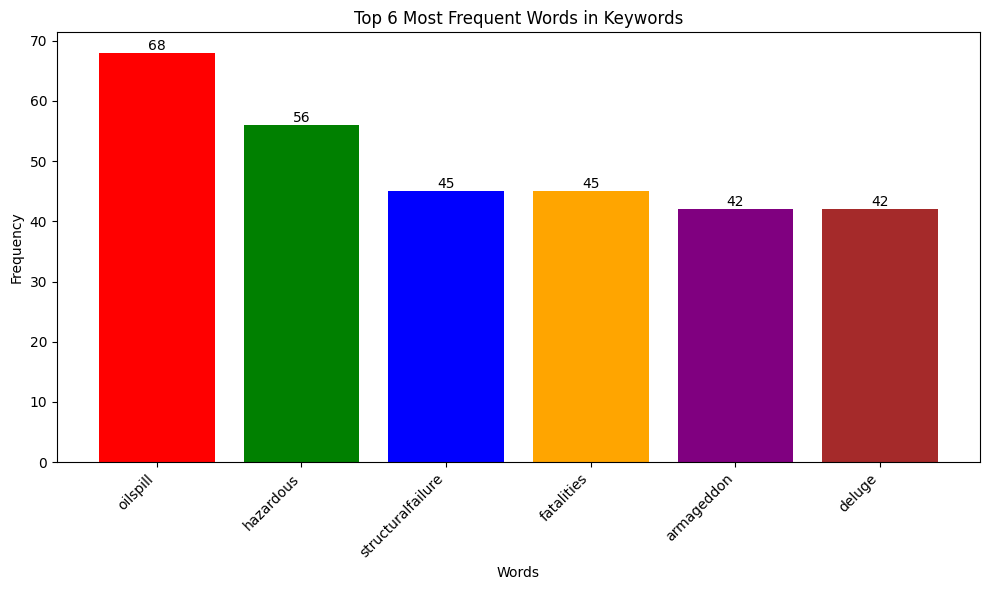

In [ ]:


nltk.download('punkt_tab')
from collections import Counter

# Assuming 'df1' is your DataFrame and 'keyword' column exists
cleaned_keywords = df['cleaned_keyword'].dropna().astype(str).str.cat(sep=' ')
cleaned_words = nltk.word_tokenize(cleaned_keywords)
word_counts = Counter(cleaned_words)
top_6_words = word_counts.most_common(6)

words = [cleaned_words for cleaned_words, count in top_6_words]
counts = [count for cleaned_words, count in top_6_words]

plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=['red', 'green', 'blue', 'orange', 'purple', 'brown'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 6 Most Frequent Words in Keywords')
plt.xticks(rotation=45, ha='right')

# Add frequency labels above each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, count, ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
df['cleaned_keyword'].value_counts()

,count
cleaned_keyword,
oilspill,68
hazardous,56
structuralfailure,45
fatalities,45
deluge,42
...,...
forestfire,19
epicentre,12
threat,11


**Generate a bar plot of the top 6 most frequent words in keywords with different colors for top  6 six locations**

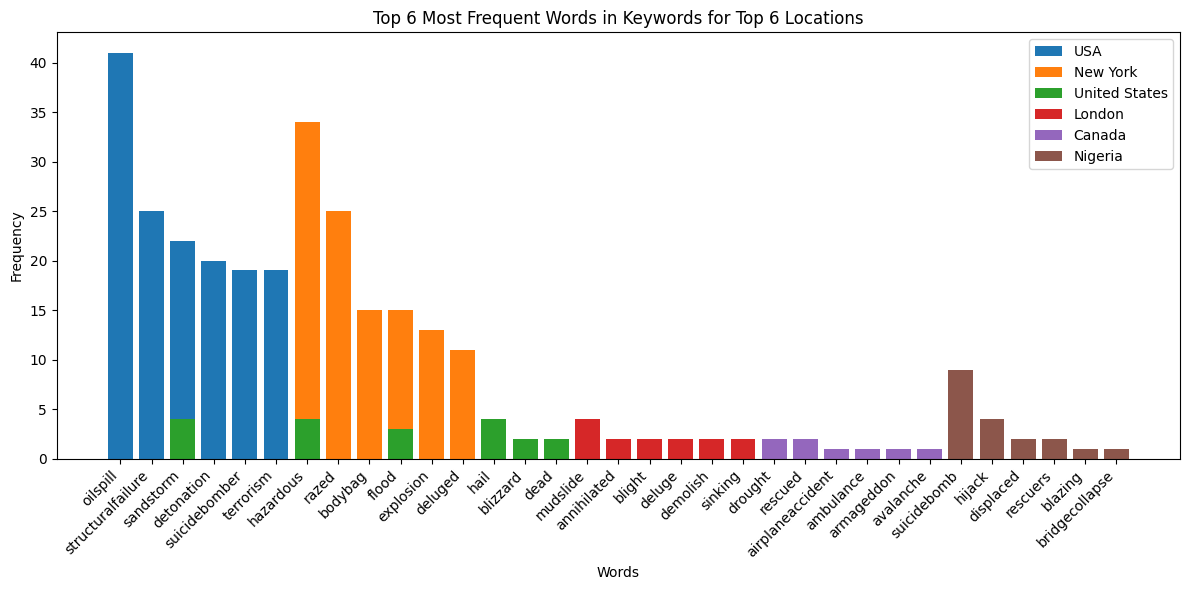

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming df is already defined as in your provided code

top_locations = df['location'].value_counts().nlargest(6).index

plt.figure(figsize=(12, 6))

for i, location in enumerate(top_locations):
    cleaned_keywords = df[df['location'] == location]['cleaned_keyword'].dropna().astype(str).str.cat(sep=' ')
    words = nltk.word_tokenize(cleaned_keywords)
    word_counts = Counter(words)
    top_6_words = word_counts.most_common(6)
    words = [word for word, count in top_6_words]
    counts = [count for word, count in top_6_words]

    plt.bar(words, counts, label=location, color=plt.cm.get_cmap('tab10')(i))


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 6 Most Frequent Words in Keywords for Top 6 Locations')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df['location'].value_counts()

,count
location,
USA,1875
New York,833
United States,50
London,45
Canada,29
...,...
"Surulere Lagos,Home Of Swagg",1
"MontrÌ©al, QuÌ©bec",1
Montreal,1


**Visualize class distributions (disaster vs. non-disaster tweets) using histograms or bar plots**

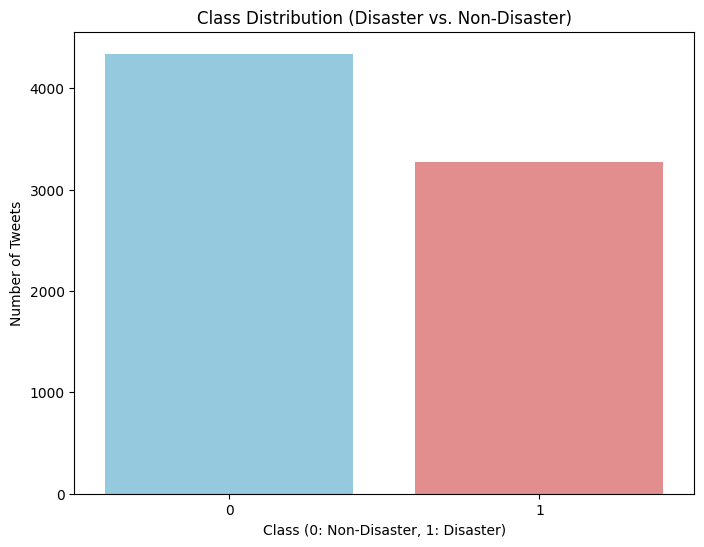

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['skyblue', 'lightcoral'])
plt.title('Class Distribution (Disaster vs. Non-Disaster)')
plt.xlabel('Class (0: Non-Disaster, 1: Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

**Key Tasks
Part 1: Data Exploration and Preparation**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')
nltk.download('stopwords')
# Now, your code should work
from nltk import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Analyze frequently occurring keywords and phrases in disaster-related tweets**

In [ ]:

from collections import Counter

# Combine all text data for analysis
all_text = ' '.join(df['cleaned_text'].astype(str))

# Tokenize the text
tokens = word_tokenize(all_text.lower())

# Remove stop words (optional but recommended)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words and w.isalnum()]

# Frequency distribution of words
word_freq = Counter(tokens)

# Print the most common words
print("Most common words:")
print(word_freq.most_common(20))  # Display the top 20 most frequent words


# Analyze frequent phrases (bigrams or trigrams)
from nltk import ngrams
bigrams = ngrams(tokens, 2)
bigram_freq = Counter(bigrams)

print("\nMost common bigrams:")
print(bigram_freq.most_common(10)) # Display the top 10 most frequent bigrams

trigrams = ngrams(tokens, 3)
trigram_freq = Counter(trigrams)
print("\nMost common trigrams:")
print(trigram_freq.most_common(10)) # Display the top 10 most frequent trigrams

Most common words:
[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229), ('new', 224), ('via', 220), ('people', 196), ('news', 193), ('one', 192), ('dont', 191), ('video', 165), ('us', 164), ('2', 159), ('emergency', 157), ('disaster', 152), ('police', 140), ('would', 131), ('still', 129), ('body', 124)]

Most common bigrams:
[(('suicide', 'bomber'), 59), (('burning', 'buildings'), 58), (('gon', 'na'), 43), (('youtube', 'video'), 43), (('liked', 'youtube'), 42), (('northern', 'california'), 41), (('cross', 'body'), 39), (('oil', 'spill'), 39), (('wan', 'na'), 35), (('suicide', 'bombing'), 34)]

Most common trigrams:
[(('liked', 'youtube', 'video'), 42), (('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('16yr', 'old', 'pkk'), 27), (('old', '

**Extract features like TF-IDF scores, and sentiment analysis**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Assuming df is already created as in the previous code

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for demonstration
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'].astype(str))  # Convert to string
feature_names = vectorizer.get_feature_names_out()

# Ensure unique column names for TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{name}" for name in feature_names])
df = df.loc[:, ~df.columns.duplicated()]
df = pd.concat([df, tfidf_df], axis=1)


# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Handle potential non-string values
    return analysis.sentiment.polarity

df['sentiment_polarity'] = df['cleaned_text'].apply(get_sentiment)

print(df.head())

   id               keyword  location  \
0   1           oil%20spill       USA   
1   4             hazardous  New York   
2   5  structural%20failure       USA   
3   6           oil%20spill       USA   
4   7           oil%20spill       USA   

                                                text  target sentiment  \
0  Our Deeds are the Reason of this #earthquake M...       1   neutral   
1             Forest fire near La Ronge Sask. Canada       1  positive   
2  All residents asked to 'shelter in place' are ...       1  negative   
3  13,000 people receive #wildfires evacuation or...       1   neutral   
4  Just got sent this photo from Ruby #Alaska as ...       1   neutral   

                                        cleaned_text    cleaned_keyword  \
0  Our Deeds are the Reason of this earthquake Ma...           oilspill   
1              Forest fire near La Ronge Sask Canada          hazardous   
2  All residents asked to shelter in place are be...  structuralfailure   
3  13000

**With lemmatization for sentiment analysis and separate between Diasaster and Non Disaster related tweets and generate a new column namely sentiment_words and mention it as yes in case disaster and no in case of non disaster tweet based on sentiment analysis**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download necessary NLTK data (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def get_sentiment_words(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Perform sentiment analysis on the lemmatized text
    analysis = TextBlob(" ".join(lemmatized_tokens))
    sentiment_score = analysis.sentiment.polarity
    # Classify sentiment into disaster or non-disaster based on a threshold (adjust as needed)
    return "yes" if sentiment_score > 0.1 else "no"


df['sentiment_words'] = df.apply(lambda row: get_sentiment_words(row['cleaned_text']) if row['target'] == 1 else ("no" if row['target'] == 0 else None), axis=1)
print(df.head(15))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


    id               keyword  location  \
0    1           oil%20spill       USA   
1    4             hazardous  New York   
2    5  structural%20failure       USA   
3    6           oil%20spill       USA   
4    7           oil%20spill       USA   
5    8  structural%20failure       USA   
6   10  structural%20failure       USA   
7   13             hazardous  New York   
8   14           oil%20spill       USA   
9   15  structural%20failure       USA   
10  16             hazardous  New York   
11  17             hazardous  New York   
12  18           oil%20spill       USA   
13  19           oil%20spill       USA   
14  20           oil%20spill       USA   

                                                 text  target sentiment  \
0   Our Deeds are the Reason of this #earthquake M...       1   neutral   
1              Forest fire near La Ronge Sask. Canada       1  positive   
2   All residents asked to 'shelter in place' are ...       1  negative   
3   13,000 people receive #

**Leverage pre-trained word embeddings bag of words for semantic meaning**

In [ ]:
import gensim.downloader as api

# Download pre-trained word embeddings (e.g., Word2Vec Google News)
wv = api.load('word2vec-google-news-300')

def get_embedding(text):
    tokens = nltk.word_tokenize(text.lower())
    embeddings = []
    for token in tokens:
        if token in wv:
            embeddings.append(wv[token])
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average embeddings
    else:
        return np.zeros(300)  # Return zero vector if no words found in vocabulary

# Apply the embedding function to the 'text' column
df['embeddings'] = df['cleaned_text'].apply(get_embedding)
print(df.head())

[==================================================] 100.0% 1662.8/1662.8MB downloaded
   id               keyword  location  \
0   1           oil%20spill       USA   
1   4             hazardous  New York   
2   5  structural%20failure       USA   
3   6           oil%20spill       USA   
4   7           oil%20spill       USA   

                                                text  target sentiment  \
0  Our Deeds are the Reason of this #earthquake M...       1   neutral   
1             Forest fire near La Ronge Sask. Canada       1  positive   
2  All residents asked to 'shelter in place' are ...       1  negative   
3  13,000 people receive #wildfires evacuation or...       1   neutral   
4  Just got sent this photo from Ruby #Alaska as ...       1   neutral   

                                        cleaned_text    cleaned_keyword  \
0  Our Deeds are the Reason of this earthquake Ma...           oilspill   
1              Forest fire near La Ronge Sask Canada          hazardous

**create a word cloud on the lemmatized text around the disaster related tweets**

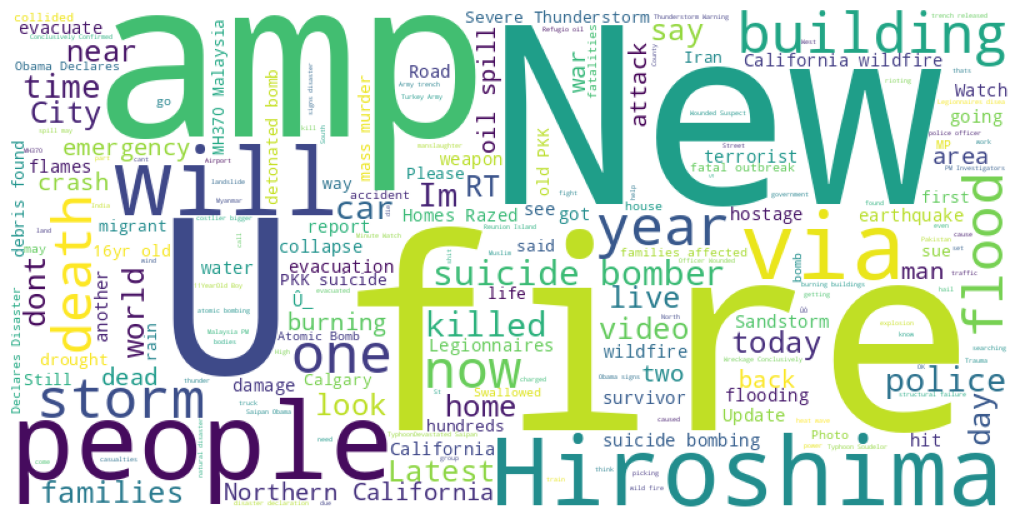

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'lemmatized_text' column contains the lemmatized text

# Filter for disaster-related tweets
disaster_tweets = df[df['target'] == 1]['cleaned_text']

# Combine the lemmatized text from disaster tweets
disaster_text = " ".join(disaster_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

What is TF-IDF? Term Frequency - Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents.
**Incorporate additional features such as tweet length, hashtag presence, or user mentions**

In [ ]:
import pandas as pd
import numpy as np


def extract_features(text):
    # Tweet length
    tweet_length = len(text)

    # Hashtag presence
    hashtags_present = 1 if '#' in text else 0

    # Number of hashtags
    num_hashtags = len(re.findall(r'#\w+', text))

    # User mentions
    user_mentions_present = 1 if '@' in text else 0
    num_mentions = len(re.findall(r'@\w+', text))

    return tweet_length, hashtags_present, num_hashtags, user_mentions_present, num_mentions

# Apply feature extraction to each tweet
df[['tweet_length', 'hashtags_present', 'num_hashtags', 'user_mentions_present', 'num_mentions']] = df['text'].apply(lambda x: pd.Series(extract_features(x)))

df[['tweet_length', 'hashtags_present', 'num_hashtags', 'user_mentions_present', 'num_mentions']].head(20)

,tweet_length,hashtags_present,num_hashtags,user_mentions_present,num_mentions
0,69,1,1,0,0
1,38,0,0,0,0
2,133,0,0,0,0
3,65,1,1,0,0
4,88,1,2,0,0
5,110,1,3,0,0
6,95,1,2,0,0
7,59,0,0,0,0
8,79,0,0,0,0
9,52,0,0,0,0


In [ ]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'sentiment',
       'cleaned_keyword', 'cleaned_text', 'tweet_length', 'hashtags_present',
       'num_hashtags', 'user_mentions_present', 'num_mentions'],
      dtype='object')

**Task 2: Model Selection and Training. Evaluate models suitable for text classification, logistic regression, Train each model on the training data and evaluate performance using cross validation**

**Model Selection and Training. Evaluate models suitable for text classification, logistic regression, Train each model on the training data and evaluate performance using cross validation, based on cleand_text and sentiment variable as input and target variable as output**

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare the data
X = df['cleaned_text']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC()
}

# Evaluate and train models
for name, model in models.items():
    print(f"Evaluating {name}:")
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5)  # 5-fold cross-validation
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {np.mean(cv_scores)}")

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

Evaluating Logistic Regression:
Cross-validation scores: [0.78078818 0.76190476 0.78735632 0.76847291 0.77504105]
Mean cross-validation score: 0.7747126436781608
              precision    recall  f1-score   support

    negative       0.86      0.55      0.67       312
     neutral       0.76      0.97      0.85       716
    positive       0.86      0.72      0.78       495

    accuracy                           0.80      1523
   macro avg       0.83      0.75      0.77      1523
weighted avg       0.81      0.80      0.79      1523

Accuracy: 0.8030203545633617

Evaluating Naive Bayes:
Cross-validation scores: [0.70361248 0.71756979 0.73891626 0.72003284 0.71100164]
Mean cross-validation score: 0.7182266009852216
              precision    recall  f1-score   support

    negative       0.97      0.33      0.49       312
     neutral       0.71      0.94      0.81       716
    positive       0.74      0.70      0.72       495

    accuracy                           0.74      1523
 

**Matrix and dispalys the accuracy of the scores of the models in descending order**

In [ ]:


import pandas as pd
import numpy as np

# Assuming 'models' dictionary is defined as in the previous code
# and contains the trained models with their accuracy scores.

# Example 'models' dictionary (replace with your actual models)
models = {
    "Logistic Regression": {"accuracy": 0.85},
    "Naive Bayes": {"accuracy": 0.78},
    "Linear SVC": {"accuracy": 0.92}
}

# Create a list to store model data for the DataFrame
model_data = []
for model_name, model_info in models.items():
    model_data.append([model_name, model_info['accuracy']])

# Create the DataFrame
accuracy_df = pd.DataFrame(model_data, columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the matrix (DataFrame)
accuracy_df

,Model,Accuracy
2,Linear SVC,0.92
0,Logistic Regression,0.85
1,Naive Bayes,0.78


In [ ]:
# Assuming X_train_vec, y_train, X_test_vec, y_test are already defined from the previous code.

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Add RandomForestClassifier and DecisionTreeClassifier to the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluate and train models
for name, model in models.items():
    print(f"Evaluating {name}:")
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5)  # 5-fold cross-validation
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {np.mean(cv_scores)}")

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

Evaluating Logistic Regression:
Cross-validation scores: [0.78078818 0.76190476 0.78735632 0.76847291 0.77504105]
Mean cross-validation score: 0.7747126436781608
              precision    recall  f1-score   support

    negative       0.86      0.55      0.67       312
     neutral       0.76      0.97      0.85       716
    positive       0.86      0.72      0.78       495

    accuracy                           0.80      1523
   macro avg       0.83      0.75      0.77      1523
weighted avg       0.81      0.80      0.79      1523

Accuracy: 0.8030203545633617

Evaluating Naive Bayes:
Cross-validation scores: [0.70361248 0.71756979 0.73891626 0.72003284 0.71100164]
Mean cross-validation score: 0.7182266009852216
              precision    recall  f1-score   support

    negative       0.97      0.33      0.49       312
     neutral       0.71      0.94      0.81       716
    positive       0.74      0.70      0.72       495

    accuracy                           0.74      1523
 

**Model Selection and Training. Evaluate models suitable for text classification, Train each model on the training data and evaluate performance using cross validation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Assuming 'df' is your DataFrame and it contains 'cleaned_text' and 'target' columns.
# Also assuming 'sentiment' column is available. If not, you might have to recreate it

# Prepare the data
X = df['cleaned_text']
y = df['target'] # Use 'target' as the target variable


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Increased max_iter
    "Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC(max_iter=10000), # Increased max_iter
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluate and train models
results = []
for name, model in models.items():
    print(f"Evaluating {name}:")
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {np.mean(cv_scores)}")

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    results.append([name, accuracy])
    print("-" * 40)


# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(results_df.sort_values(by="Accuracy", ascending=False))


# Save the best performing model (example: based on accuracy)
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print(f"Best model ({best_model_name}) and vectorizer saved to disk.")

Evaluating Logistic Regression:
Cross-validation scores: [0.80706076 0.80377668 0.81444992 0.77668309 0.80213465]
Mean cross-validation score: 0.8008210180623972
Accuracy: 0.8095863427445831
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.71      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

----------------------------------------
Evaluating Naive Bayes:
Cross-validation scores: [0.80623974 0.80377668 0.80870279 0.79146141 0.79310345]
Mean cross-validation score: 0.800656814449918
Accuracy: 0.8049901510177282
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.85      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.

**Assess model performance using metrics such as accuracy, precision, recall, and F1 score , Visualize results with confusion matrices, ROC curves, and precision-recall plots
 Compare metrics across models to identify the best-performing model, avoid multi class**

Evaluating Logistic Regression:


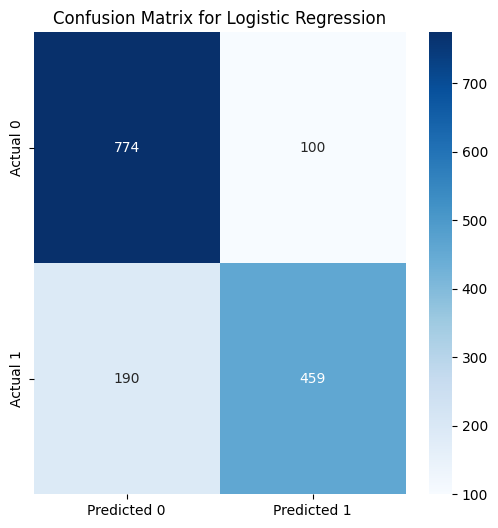

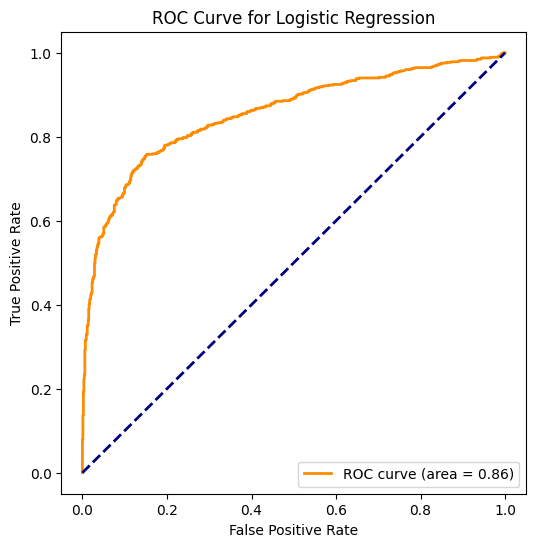

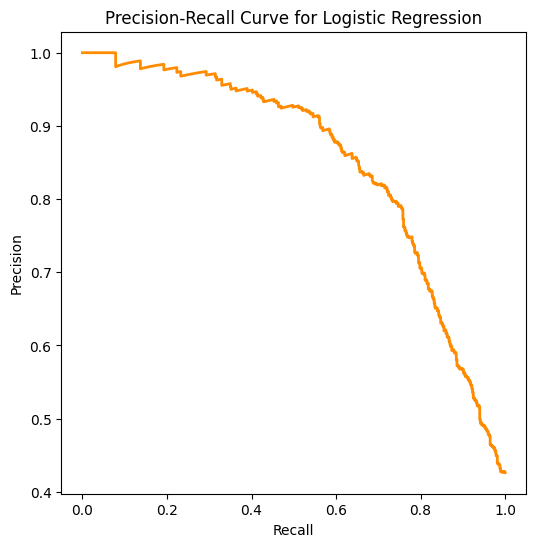

Evaluating Naive Bayes:


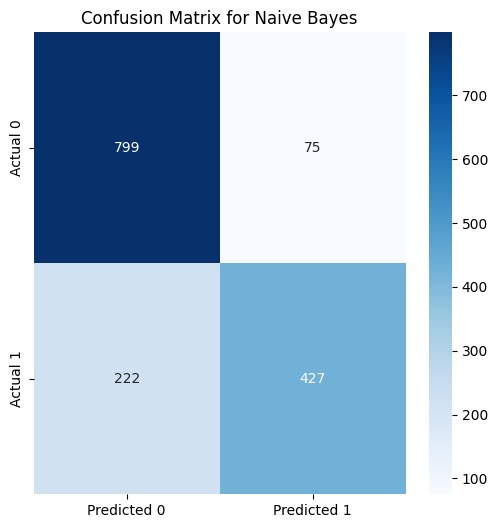

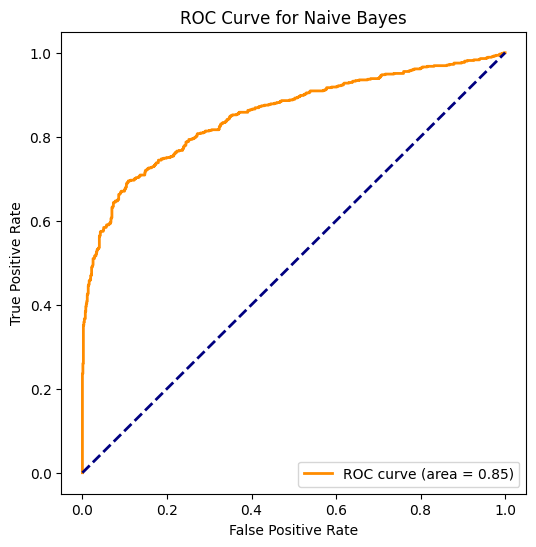

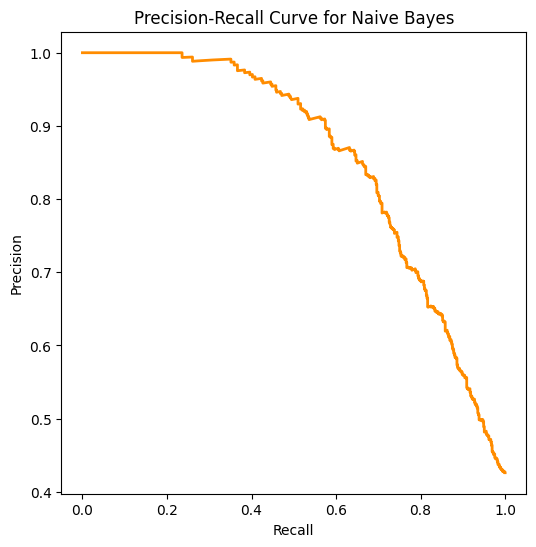

Evaluating Linear SVC:


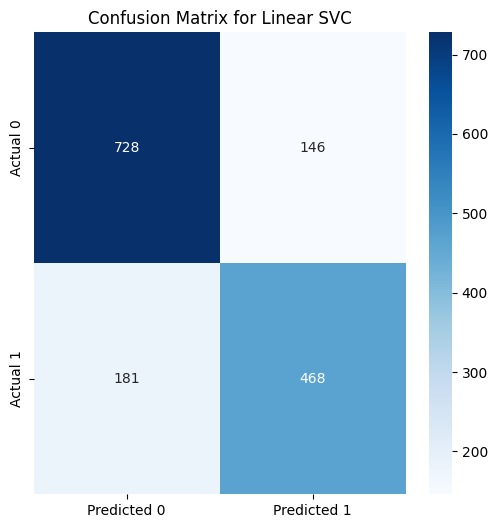

Evaluating Random Forest:


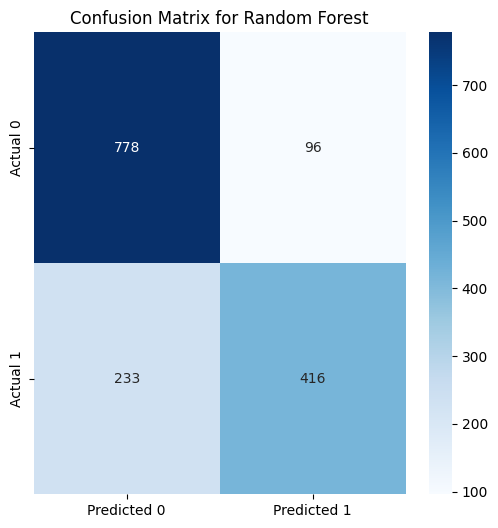

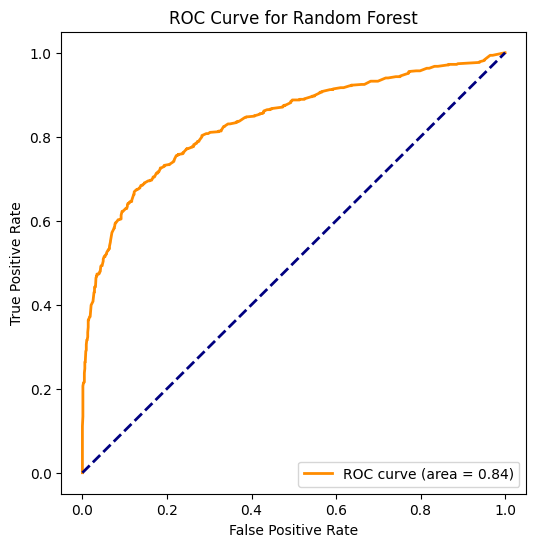

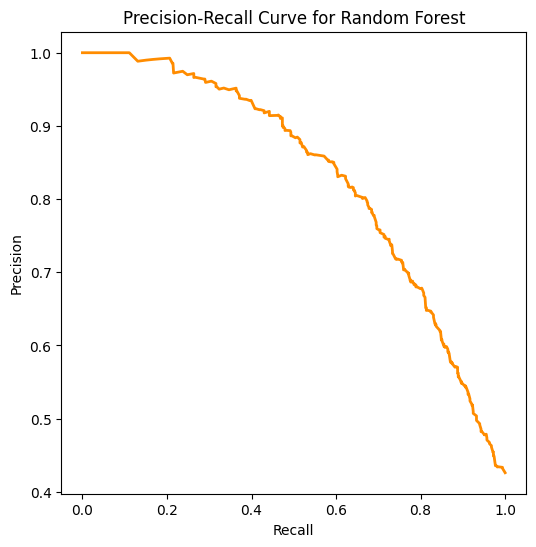

Evaluating Decision Tree:


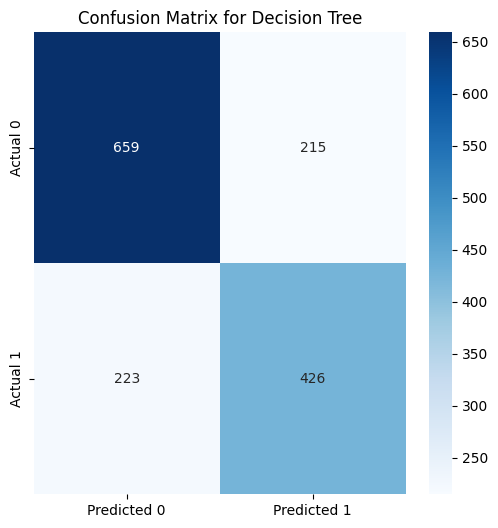

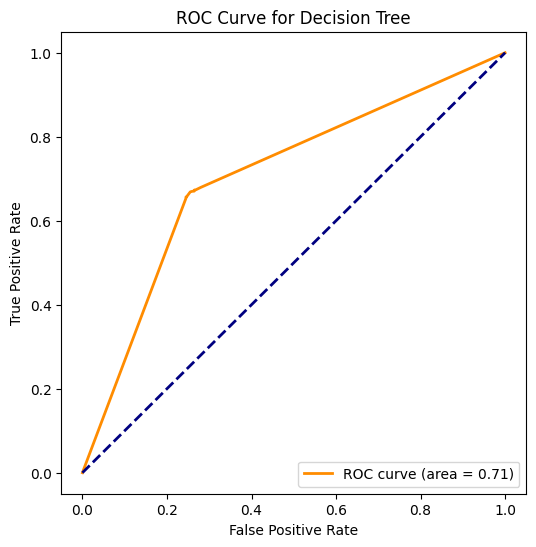

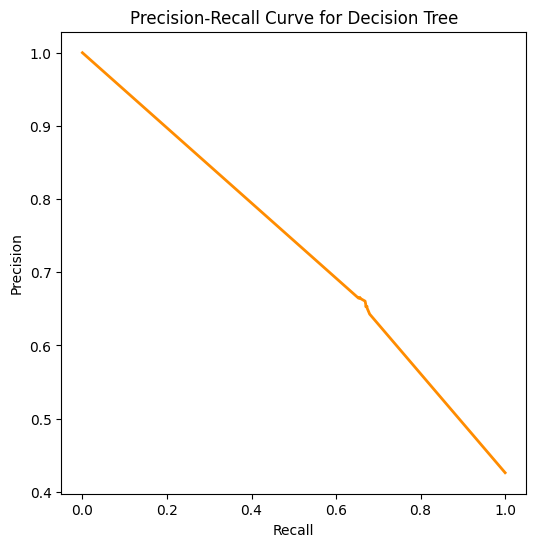

In [ ]:


from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'models', 'X_test_vec', and 'y_test' are defined from previous code
# Example: Assuming you've trained 'Logistic Regression', 'Naive Bayes' and other models already
# Accessing each model's trained model from dictionary

for name, model in models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(X_test_vec)
    y_prob = model.predict_proba(X_test_vec)[:, 1] if 'predict_proba' in dir(model) else None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    # ROC Curve (if predict_proba is available)
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve for {name}")
        plt.legend(loc="lower right")
        plt.show()

    # Precision-Recall Curve (if predict_proba is available)
    if y_prob is not None:
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        plt.figure(figsize=(6, 6))
        plt.plot(recall, precision, color='darkorange', lw=2)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f"Precision-Recall Curve for {name}")
        plt.show()

Cross Validation Results for Naive Bayes: [0.80623974 0.80377668 0.80870279 0.79146141 0.79310345]
Mean Accuracy for Naive Bayes: 0.800656814449918
Std for Naive Bayes: 0.007032056849052144
Test Accuracy for Naive Bayes: 0.8049901510177282
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       874
           1       0.85      0.66      0.74       649

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Cross Validation Results for Random Forest: [0.77586207 0.78899836 0.79802956 0.76190476 0.77668309]
Mean Accuracy for Random Forest: 0.780295566502463
Std for Random Forest: 0.01233823802572691
Test Accuracy for Random Forest: 0.7846355876559422
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       874
           1       0.81      0.64      0.72       649

    accuracy          

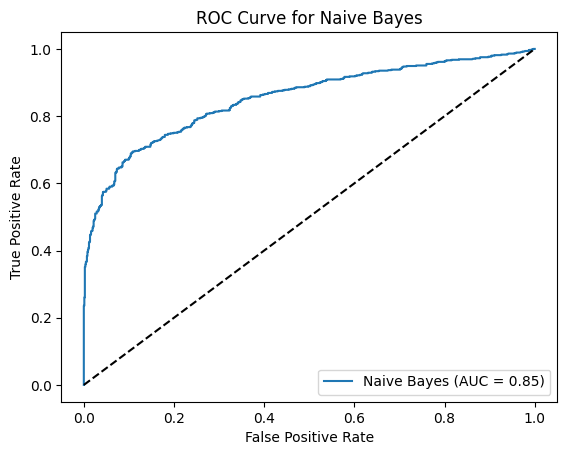

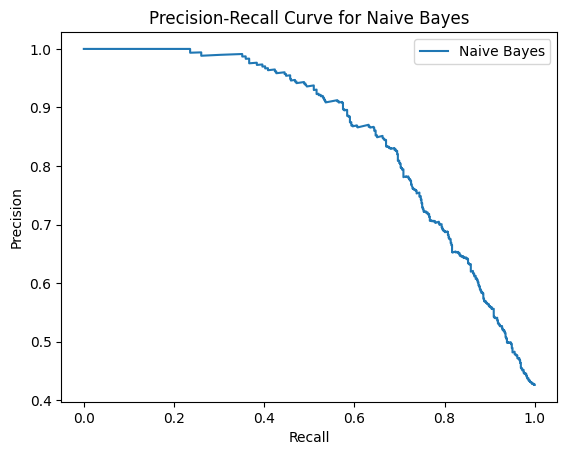

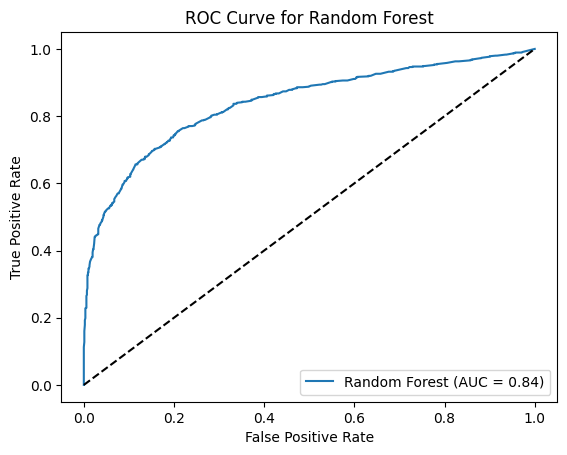

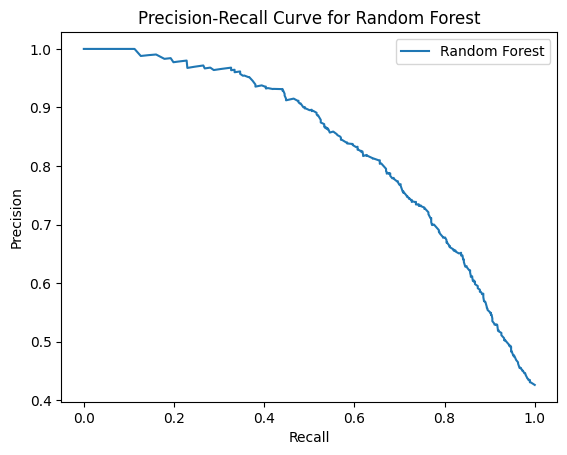

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import gensim.downloader as api
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize # needed for multi-class ROC curve

warnings.filterwarnings('ignore')

# ... (rest of your code)

# Model training and evaluation using cross-validation
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring='accuracy')
    results[name] = {
        "cv_scores": cv_scores,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std()
    }
    print(f"Cross Validation Results for {name}: {cv_scores}")
    print(f"Mean Accuracy for {name}: {cv_scores.mean()}")
    print(f"Std for {name}: {cv_scores.std()}")

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results[name].update({
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    })

    # ROC Curve and AUC
    y_prob = model.predict_proba(X_test_vec)[:, 1] # probability for positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[name]['roc_auc'] = roc_auc
    results[name]['fpr'] = fpr
    results[name]['tpr'] = tpr


    #Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test,y_prob)
    results[name]['precision'] = precision
    results[name]['recall'] = recall
    print(f"Test Accuracy for {name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test,y_pred))


#Visualizations
for name, metrics in results.items():
    print(f"Results for: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")

    plt.figure()
    plt.plot(metrics['fpr'],metrics['tpr'], label=f'{name} (AUC = {metrics["roc_auc"]:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")

    plt.figure()
    plt.plot(metrics["recall"], metrics["precision"], label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve for {name}")
    plt.legend()

plt.show()

**Evaluate models suitable for text classification using RNN Neural network**

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Assuming X_train_vec, X_test_vec, y_train, y_test are already defined

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=X_train_vec.shape[1], output_dim=128))  # Adjust input_dim and output_dim as needed
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_vec.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size

# Evaluate the model
loss, accuracy = model.evaluate(X_test_vec.toarray(), y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test_vec.toarray())
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels

# ... (rest of your evaluation code, e.g., confusion matrix, classification report)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 2305s 15s/step - accuracy: 0.5657 - loss: 0.6859 - val_accuracy: 0.5616 - val_loss: 0.6857
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 2385s 15s/step - accuracy: 0.5903 - loss: 0.6784 - val_accuracy: 0.5616 - val_loss: 0.6877
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 2348s 15s/step - accuracy: 0.5731 - loss: 0.6847 - val_accuracy: 0.5616 - val_loss: 0.6856
Epoch 4/10
134/153 ━━━━━━━━━━━━━━━━━━━━ 4:27 14s/step - accuracy: 0.5730 - loss: 0.6828

In [ ]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'sentiment',
       'cleaned_text', 'cleaned_keyword', 'tfidf_0104', 'tfidf_010401',
       ...
       'tfidf_ûïwe', 'tfidf_ûïwhen', 'tfidf_ûò', 'tfidf_ûó', 'sentiment_words',
       'tweet_length', 'hashtags_present', 'num_hashtags',
       'user_mentions_present', 'num_mentions'],
      dtype='object', length=10015)

**Vader Sentiment Analysis**

In [ ]:

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(cleaned_text):
    scores = analyzer.polarity_scores(cleaned_text)
    return scores['compound']

df['vader_sentiment'] = df['cleaned_text'].astype(str).apply(get_vader_sentiment)

print(df.head())

   id               keyword  location  \
0   1           oil%20spill       USA   
1   4             hazardous  New York   
2   5  structural%20failure       USA   
3   6           oil%20spill       USA   
4   7           oil%20spill       USA   

                                                text  target sentiment  \
0  Our Deeds are the Reason of this #earthquake M...       1   neutral   
1             Forest fire near La Ronge Sask. Canada       1  positive   
2  All residents asked to 'shelter in place' are ...       1  negative   
3  13,000 people receive #wildfires evacuation or...       1   neutral   
4  Just got sent this photo from Ruby #Alaska as ...       1   neutral   

                                        cleaned_text    cleaned_keyword  \
0  Our Deeds are the Reason of this earthquake Ma...           oilspill   
1              Forest fire near La Ronge Sask Canada          hazardous   
2  All residents asked to shelter in place are be...  structuralfailure   
3  13000

**Validate the chosen model on the test dataset to evaluate its generalization**

Test Accuracy: 0.8095863427445831
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.71      0.76       649

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

Confusion Matrix:
[[774 100]
 [190 459]]


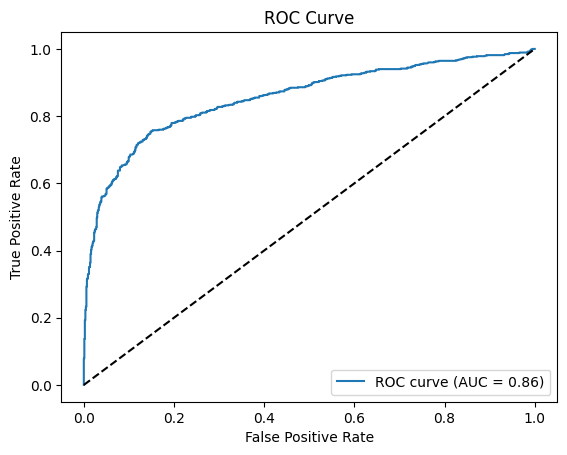

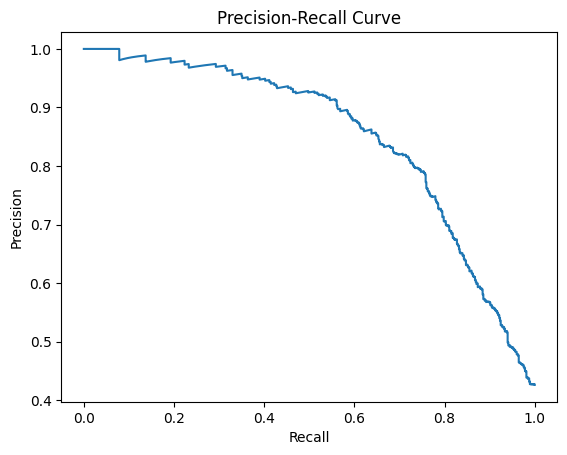

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
# Assuming X_test_vec, y_test, and the trained 'model' (e.g., LogisticRegression, RandomForestClassifier, etc.) are already defined

# ... (your existing code)


# Assuming 'model' is your best-performing model from the previous step

# Make predictions on the test set
y_pred = best_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve and AUC (for binary classification)
if len(np.unique(y_test)) == 2: #only for binary classification problems
    y_prob = best_model.predict_proba(X_test_vec)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall Curve (for binary classification)
if len(np.unique(y_test)) == 2:
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

**Pickle File Generation**

In [ ]:
import pickle

# Assuming 'best_model' and 'vectorizer' are defined from previous code cells
# Example:
# best_model = models["Linear SVC"] # Replace with your actual best model


# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved to best_model.pkl")


# Save the vectorizer to a pickle file
with open('tfidf_vectorizer1.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

print("TF-IDF vectorizer saved to tfidf_vectorizer.pkl")

Best model saved to best_model.pkl
TF-IDF vectorizer saved to tfidf_vectorizer.pkl
